# Exploratory Stage

#### Goals of Exploratory phase:
- Determine drivers of churn
- Answer the key questions
- Answer hypotheses
- Explore data visually
- Set the baseline model

#### Conduct Analysis of County Tax Rates

In [16]:
# Importing needed libraries:

import pandas as pd
import numpy as np

# visualizing
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=14)

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# importing stats for hypothesis testing:
from scipy import stats

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the os library to access the env (credit)
import os
import env

from env import host, user, password

In [17]:
import acquire
import prep
import wrangle

### Setting up data frame for Exploring

We're using the prep.py and wrangle.py files we created earlier.

We use .shape, .info() and .describe() to get an idea of the size of the dataframe, the types of column data we are working with, and the key statistics of all our numerical columns

In [18]:
df = prep.prep_zillow_data()
df.shape

(20977, 24)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20977 entries, 0 to 21351
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   20977 non-null  float64
 1   bedroomcnt                    20977 non-null  float64
 2   calculatedbathnbr             20977 non-null  float64
 3   calculatedfinishedsquarefeet  20977 non-null  float64
 4   fips                          20977 non-null  float64
 5   fullbathcnt                   20977 non-null  float64
 6   heatingorsystemtypeid         20977 non-null  float64
 7   latitude                      20977 non-null  float64
 8   longitude                     20977 non-null  float64
 9   lotsizesquarefeet             20977 non-null  float64
 10  propertylandusetypeid         20977 non-null  float64
 11  rawcensustractandblock        20977 non-null  float64
 12  regionidcity                  20977 non-null  float64
 13  r

In [20]:
df.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusetypeid
count,20977.000000,20977.000000,20977.000000,20977.000000,20977.000000,20977.000000,20977.000000,2.097700e+04,2.097700e+04,2.097700e+04,...,20977.000000,20977.000000,20977.000000,20977.000000,2.097700e+04,2.097700e+04,20977.0,2.097700e+04,20977.000000,20977.000000
mean,2.255065,3.029461,2.272051,1733.590414,6049.399485,2.203561,3.971021,3.400482e+07,-1.182015e+08,2.721772e+04,...,96592.488688,1.549888,1.106540,1967.995593,1.766183e+05,4.672261e+05,2016.0,2.906078e+05,5718.334901,261.699433
std,0.903462,1.090442,0.882514,771.085739,21.152271,0.871318,2.848036,2.672361e+05,3.611021e+05,8.660500e+04,...,3648.736209,2.872265,0.364304,23.693910,1.586827e+05,4.739390e+05,0.0,3.655081e+05,5460.265168,3.806058
min,0.000000,0.000000,1.000000,242.000000,6037.000000,1.000000,1.000000,3.334085e+07,-1.193883e+08,4.350000e+02,...,95982.000000,0.000000,1.000000,1824.000000,1.290000e+02,1.050400e+04,2016.0,2.250000e+03,19.920000,246.000000
25%,2.000000,2.000000,2.000000,1181.000000,6037.000000,2.000000,2.000000,3.380829e+07,-1.184121e+08,5.971000e+03,...,96193.000000,0.000000,1.000000,1953.000000,8.421000e+04,2.080000e+05,2016.0,8.593500e+04,2712.610000,261.000000
50%,2.000000,3.000000,2.000000,1542.000000,6037.000000,2.000000,3.955741,3.401747e+07,-1.181770e+08,7.541000e+03,...,96395.000000,0.000000,1.000000,1968.261201,1.368320e+05,3.600840e+05,2016.0,2.055310e+05,4459.800000,261.000000
75%,3.000000,4.000000,3.000000,2096.000000,6059.000000,3.000000,3.955741,3.417625e+07,-1.179251e+08,1.973900e+04,...,96987.000000,0.000000,1.108271,1986.000000,2.163420e+05,5.720000e+05,2016.0,3.715490e+05,6954.080000,266.000000
max,10.000000,12.000000,10.000000,4633.000000,6111.000000,10.000000,24.000000,3.477966e+07,-1.175554e+08,3.589145e+06,...,399675.000000,12.000000,4.000000,2015.000000,3.416000e+06,9.323011e+06,2016.0,8.719214e+06,109468.980000,275.000000


#### Charting potential independent variables:
These histograms we used to visualize the distributions of some of the features we think might be good independent variables to use in our models. The goal is to see how normally distributed these variables are.

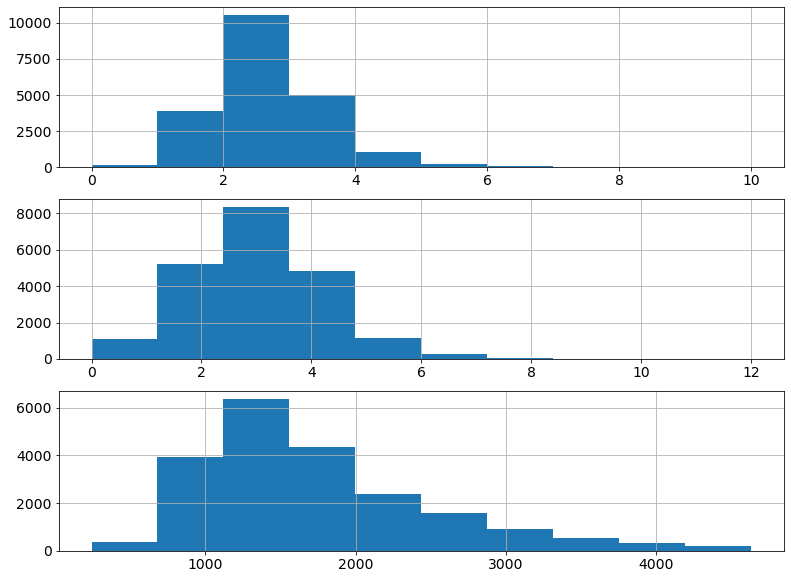

In [6]:
plt.subplot(311)
df.bathroomcnt.hist()


plt.subplot(312)
df.bedroomcnt.hist()

plt.subplot(313)
df.calculatedfinishedsquarefeet.hist()

plt.show()

#### Overall dataframe histogram

This histogram allows us to see which features in the current dataframe have the highest and lowest correlation. Overall, we will be looking for features that have the strongest positive and negative correlations, so long as they are not features that are derived from each other.

<AxesSubplot:>

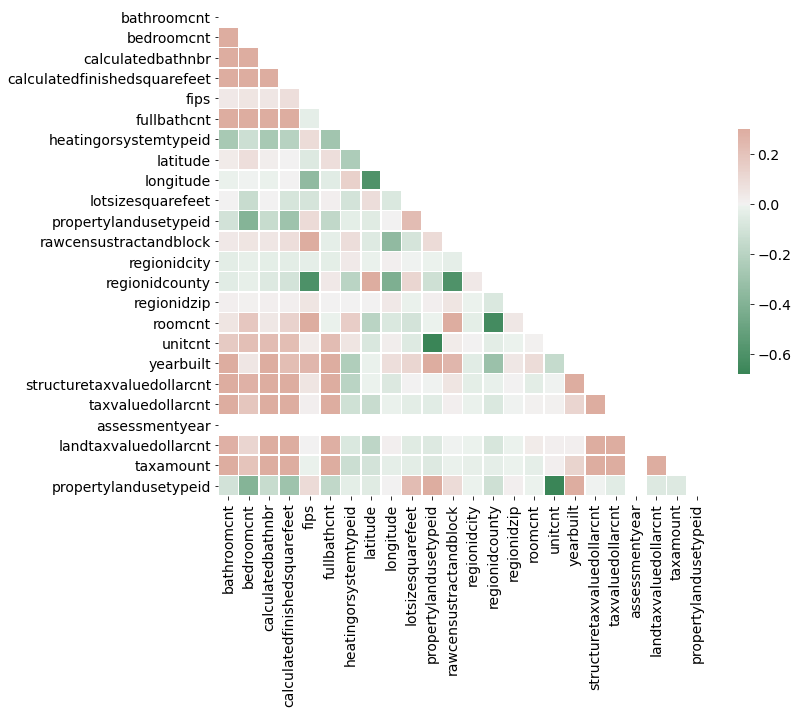

In [7]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Takeaways: the features with the strongest negative and positive correlation to Tax Valuation (`taxvaluedollarcnt`) are:

- `bathroomcnt`
- `bedroomcnt`
- `calculatedbathnbr`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`

We threw out `structuretaxvaluedollarcnt` and `yearbuilt` since they were either a column that is basically the same information, or there were basically unrelated columns. However, in the case of `yearbuilt`, there could be some interesting information gleaned if we had more time to combine that feature with other like features and help improve the model possibly.

#### Heatmap isolating down to the top 5 correlated features to our target variable

<AxesSubplot:>

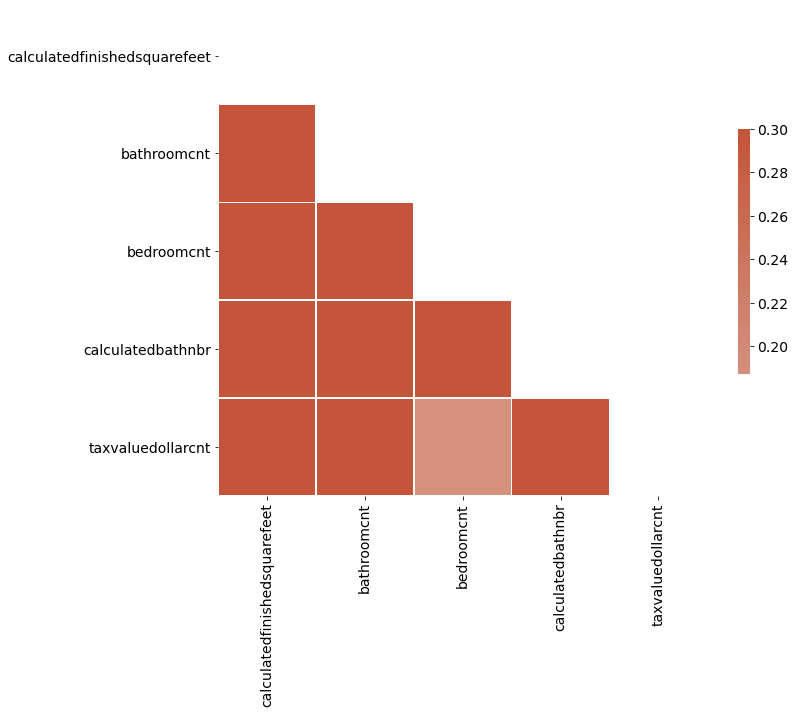

In [8]:
# Creating a dataframe for a more managable heatmap
corr_eval_df = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr','taxvaluedollarcnt']]

# Code for the heatmap itself:
corr = corr_eval_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
df_test = acquire.get_zillow_data()

In [11]:
eval_df = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr','taxvaluedollarcnt']]

In [12]:
eval_df.shape

(20977, 5)

In [13]:
eval_df.describe().round(1)

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt,calculatedbathnbr,taxvaluedollarcnt
count,20977.0,20977.0,20977.0,20977.0,20977.0
mean,1733.6,2.3,3.0,2.3,467226.1
std,771.1,0.9,1.1,0.9,473939.0
min,242.0,0.0,0.0,1.0,10504.0
25%,1181.0,2.0,2.0,2.0,208000.0
50%,1542.0,2.0,3.0,2.0,360084.0
75%,2096.0,3.0,4.0,3.0,572000.0
max,4633.0,10.0,12.0,10.0,9323011.0


In [14]:
df.describe().round(1)

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusetypeid
count,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,...,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0
mean,2.3,3.0,2.3,1733.6,6049.4,2.2,4.0,34004824.3,-118201545.3,27217.7,...,96592.5,1.5,1.1,1968.0,176618.3,467226.1,2016.0,290607.8,5718.3,261.7
std,0.9,1.1,0.9,771.1,21.2,0.9,2.8,267236.1,361102.1,86605.0,...,3648.7,2.9,0.4,23.7,158682.7,473939.0,0.0,365508.1,5460.3,3.8
min,0.0,0.0,1.0,242.0,6037.0,1.0,1.0,33340851.0,-119388346.0,435.0,...,95982.0,0.0,1.0,1824.0,129.0,10504.0,2016.0,2250.0,19.9,246.0
25%,2.0,2.0,2.0,1181.0,6037.0,2.0,2.0,33808288.0,-118412113.0,5971.0,...,96193.0,0.0,1.0,1953.0,84210.0,208000.0,2016.0,85935.0,2712.6,261.0
50%,2.0,3.0,2.0,1542.0,6037.0,2.0,4.0,34017471.0,-118177000.0,7541.0,...,96395.0,0.0,1.0,1968.3,136832.0,360084.0,2016.0,205531.0,4459.8,261.0
75%,3.0,4.0,3.0,2096.0,6059.0,3.0,4.0,34176250.0,-117925067.0,19739.0,...,96987.0,0.0,1.1,1986.0,216342.0,572000.0,2016.0,371549.0,6954.1,266.0
max,10.0,12.0,10.0,4633.0,6111.0,10.0,24.0,34779658.0,-117555373.0,3589145.0,...,399675.0,12.0,4.0,2015.0,3416000.0,9323011.0,2016.0,8719214.0,109469.0,275.0


In [16]:
# Converting a continuous into a categorical:

eval_df['tax_range'] = pd.cut(df.taxvaluedollarcnt, bins = [25504, 210000, 360000, 572000, 600000], labels = ["Low", "Medium", "Med-High", "High"])

In [17]:
eval_df.isna().sum()

calculatedfinishedsquarefeet       0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                  0
taxvaluedollarcnt                  0
tax_range                       4869
dtype: int64

In [18]:
eval_df.tax_range.value_counts()

Low         5253
Med-High    5246
Medium      5195
High         414
Name: tax_range, dtype: int64

In [19]:
# eval_df = eval_df.dropna

<AxesSubplot:xlabel='tax_range', ylabel='bedroomcnt'>

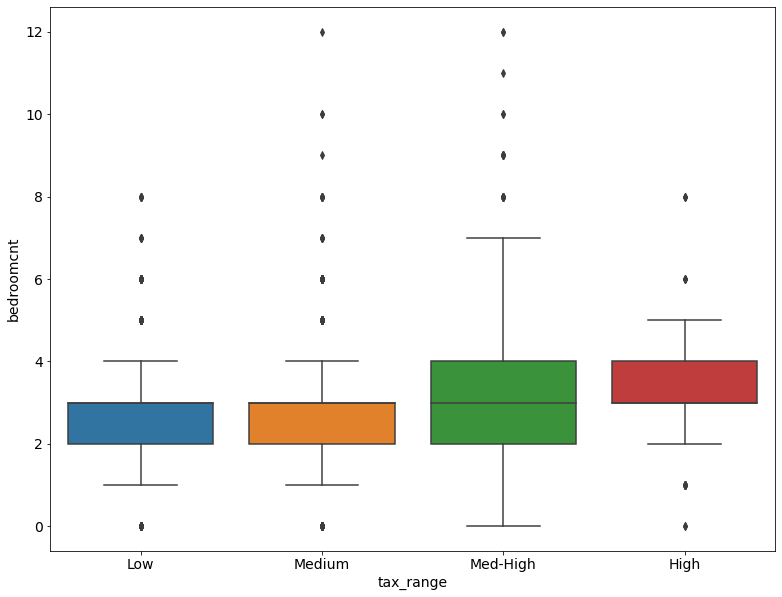

In [20]:
sns.boxplot(data=eval_df, y='bedroomcnt', x='tax_range')

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

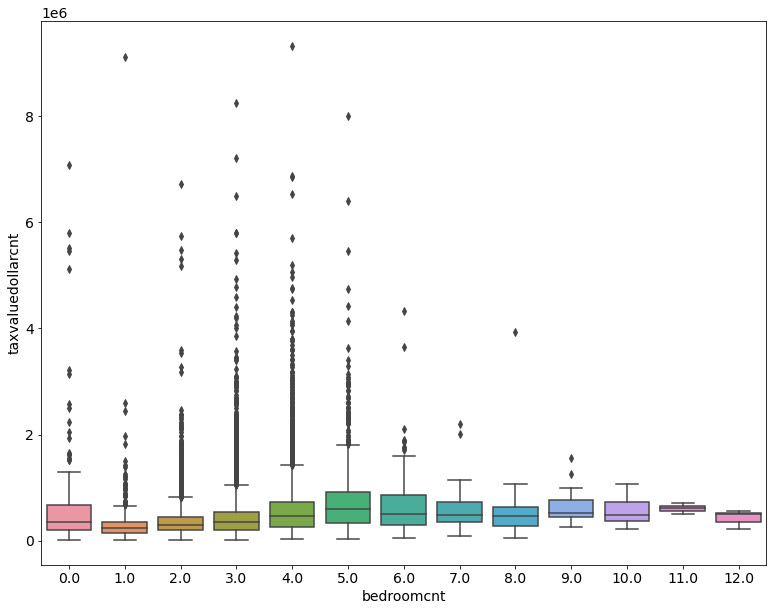

In [22]:
# Boxplot of bedroom counts compared to tax valuation:

sns.boxplot(x = 'bedroomcnt', y = 'taxvaluedollarcnt', data = df)

# Splitting and Scaling

Now that we have our independent variables, we now split the data to prepare it for the modeling stage.

In [24]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df)

In [25]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.min_max_scale(X_train, X_validate, X_test)

<AxesSubplot:xlabel='bedroomcnt', ylabel='bathroomcnt'>

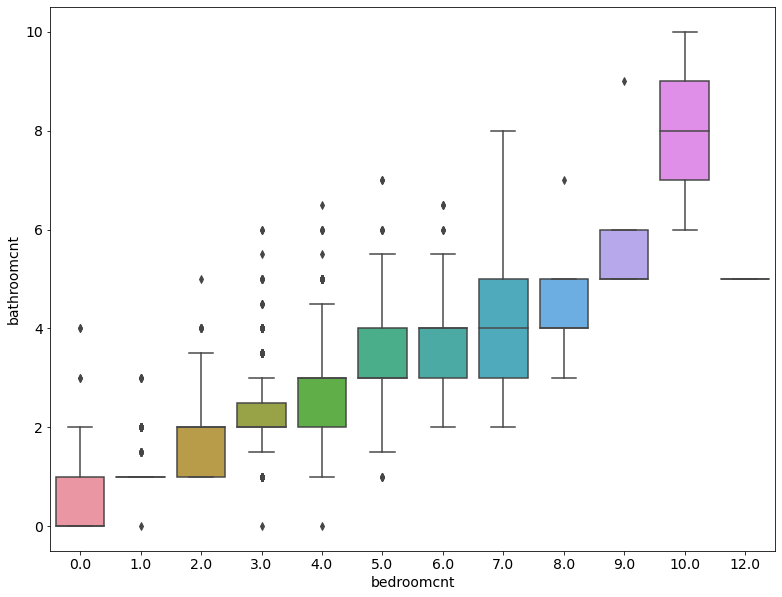

In [26]:
sns.boxplot(x = 'bedroomcnt', y = 'bathroomcnt', data = X_train)

In [27]:
df.fips.value_counts()

6037.0    13385
6059.0     5802
6111.0     1790
Name: fips, dtype: int64

In [28]:
zillow_heatmap = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr','taxvaluedollarcnt']]

corr = zillow_heatmap.corr()
corr

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt,calculatedbathnbr,taxvaluedollarcnt
calculatedfinishedsquarefeet,1.000000,0.740599,0.638380,0.772457,0.498825
bathroomcnt,0.740599,1.000000,0.607156,0.975734,0.401308
bedroomcnt,0.638380,0.607156,1.000000,0.569875,0.187359
calculatedbathnbr,0.772457,0.975734,0.569875,1.000000,0.422731
taxvaluedollarcnt,0.498825,0.401308,0.187359,0.422731,1.000000


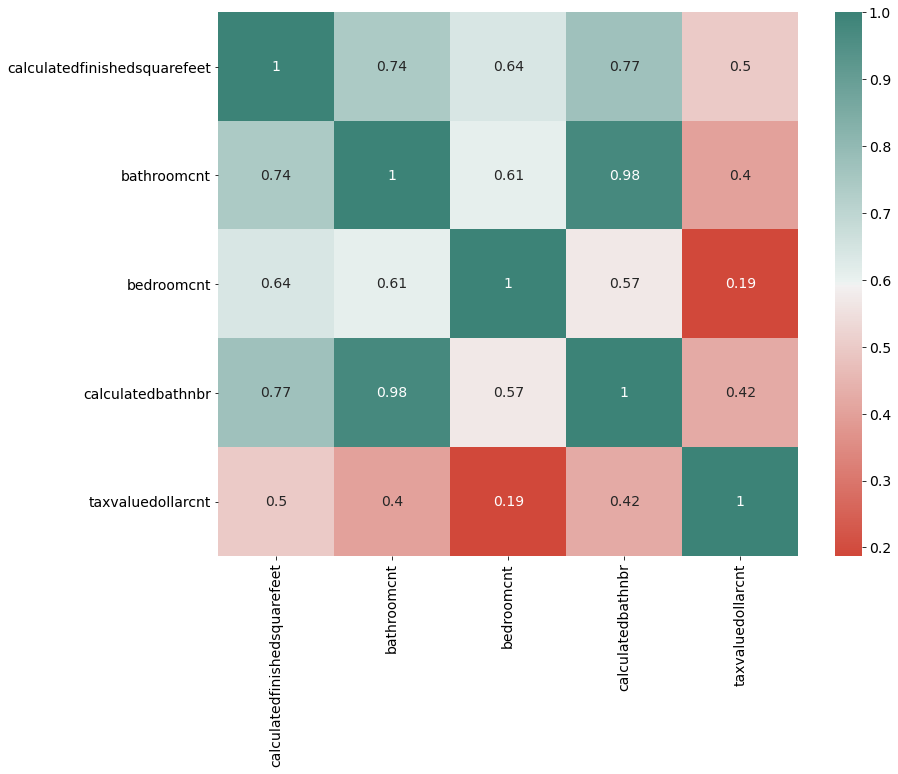

In [29]:
cmap = sns.diverging_palette(15, 175, as_cmap = True)

sns.heatmap(corr, annot = True, cmap = cmap)
plt.show()

### Charting Bedroom count vs Square Feet

These charts compare the square footage (continuous variable) vs. the number of bedrooms a property has

In [30]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    sns.barplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.violinplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)

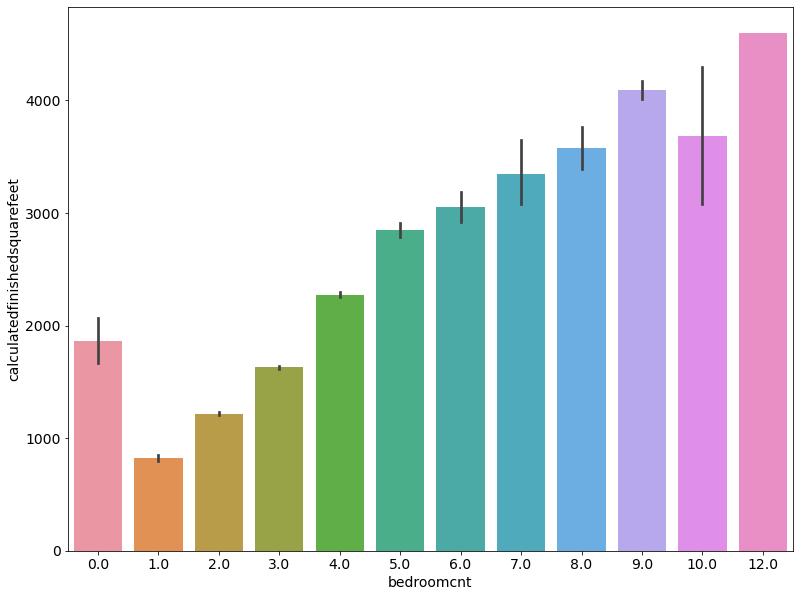

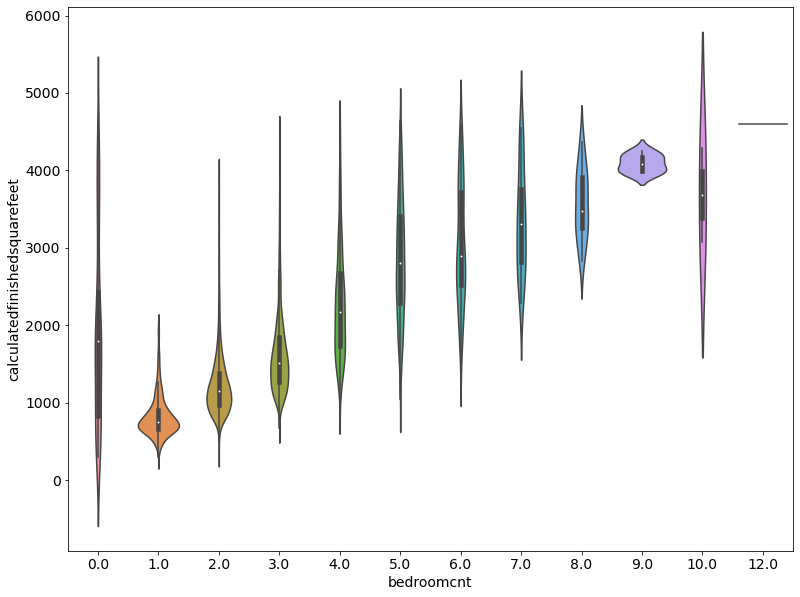

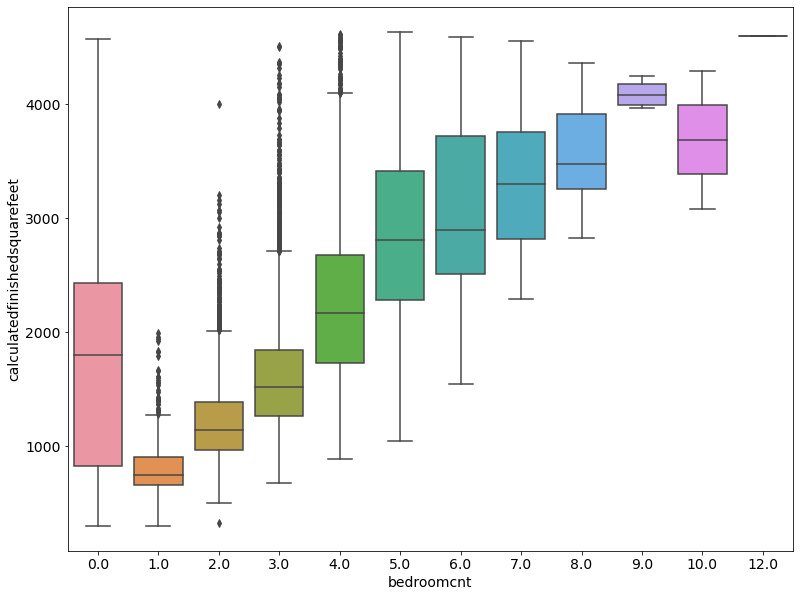

In [34]:
plot_categorical_and_continuous_vars(X_train, 'bedroomcnt', 'calculatedfinishedsquarefeet')

## Hypothesis Testing

In this stage we will test the following hypotheses:

### 1st Hypothesis:

- $ H_0 $: Properties with more than 2 or more bedrooms do not have higher tax valuation

- $ H_a $: Properties with more than 2 or more bedrooms do have higher tax valuation

**We will use a 1 sample t-test for testing this hypothesis**

### 2nd Hypothesis:

- $ H_0 $: Properties with two or more bedrooms do not have more square footage than the average property.

- $ H_a $: Properties with two or more bedrooms do have more square footage than the average property.

**We will use a t-test for this hypothesis as well**

Setting the alpha level for our hypothesis tests:

In [35]:
alpha = .05

### 1st Hypothesis:

- $ H_0 $: Properties with more than 2 or more bedrooms do not have higher tax valuation

- $ H_a $: Properties with more than 2 or more bedrooms do have higher tax valuation

**We will use a 1 sample t-test for testing this hypothesis**

In [36]:
# Hypothesis: Properties with more than 2 or more bedrooms have higher tax valuation:

roomcount = df[df.bedroomcnt >= 2]
t, p = stats.ttest_1samp(roomcount.taxvaluedollarcnt, df.taxvaluedollarcnt.mean())
print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 1.731
p = 0.084


#### Takeaway:

- The p value is > than our $ alpha $, thus we fail to reject the null hypothesis. 

### 2nd Hypothesis:

- $ H_0 $: Properties with two or more bedrooms do not have more square footage than the average property.

- $ H_a $: Properties with two or more bedrooms do have more square footage than the average property.

In [37]:
roomcount = df[df.bedroomcnt >= 2]
t, p = stats.ttest_1samp(roomcount.calculatedfinishedsquarefeet, df.calculatedfinishedsquarefeet.mean())
print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 7.319
p = 0.000


#### Takeaway:

- The p value is < than our $ alpha $, thus we reject the null hypothesis.

## Exploring for Tax Values Report

This section of the exploration stage has a goal of producing a dataframe that contains all the relavant location and tax rate data requested by the Zillow data science team.



In [39]:
# Getting the dataframe

In [21]:
tax_df_get = acquire.get_zillow_data()

In [22]:
tax_df_get.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,...,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,...,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [23]:
tax_df_get.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   airconditioningtypeid         6569 non-null   float64
 3   architecturalstyletypeid      49 non-null     float64
 4   basementsqft                  12 non-null     float64
 5   bathroomcnt                   21352 non-null  float64
 6   bedroomcnt                    21352 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         13363 non-null  float64
 9   calculatedbathnbr             21180 non-null  float64
 10  decktypeid                    179 non-null    float64
 11  finishedfloor1squarefeet      1765 non-null   float64
 12  calculatedfinishedsquarefeet  21297 non-null  float64
 13  f

In [24]:
tax_df = tax_df_get[['id','parcelid', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 
                     'taxamount', 'fips', 'latitude', 'longitude', 'regionidcity', 
                     'regionidcounty', 'regionidneighborhood', 'regionidzip', 'taxdelinquencyflag', 'taxdelinquencyyear']]

In [25]:
# Creating the tax rate column
tax_df['tax_rate'] = (tax_df.taxamount / tax_df.taxvaluedollarcnt) * 100
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705


## Deriving Location Information.

- The countyID and region ids appear to have been obfuscated in order for privacy reasons, however there are several ways to identify state, county, and zip code information using latitude and longitude information.

- However, first of all, the latitude and longitude numbers needed to be adjusted.

### Fixing the Latitude and Longitude numbers.

In [26]:
# Run this cell to move the decimal point over for the latitude and longitude numbers. Otherwise, those columns are useless.

tax_df['lat_cor'] = tax_df.latitude / 1000000
tax_df['long_cor'] = tax_df.longitude / 1000000
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate,lat_cor,long_cor
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536,33.981374,-118.317057
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505,34.686163,-118.113100
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962,33.999877,-118.291863
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299,33.694636,-117.912245
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705,33.985377,-118.361620


Discovered that there were some big outliers in the data for tax amount and tax rate (which is derived from tax amount / property tax value). The takeaway from that analysis was that those homes with tax deliquencies sometimes paid a large tax bill in a given year, causing that tax rate to shoot way up, when it otherwise wouldn't have.

#### First method attempt at finding county information:

Attempted to use a python library, geopy to reverse find the zip codes for a given latitude and longitutde, but according to the terms of service, the number of rows we had in our dataframe (21,000+) would have produced more API calls than the free version would allow, thus we opted for another approach shown below to find the counties in which each property was located.

In [27]:
# Importing the library:

import geopy

# To install geopy, follow this link:
# https://geopy.readthedocs.io/en/stable/

In [28]:
# Function that reverse finds the zip code from latitude and longitude coordinates.
# Function produces an address and zipcode. I then put those into a dataframe for testing.

def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='directorb@gmail.com')

df_geo_test = pd.DataFrame({
    'Lat': [29.39291, 29.39923, 29.40147, 29.38752, 29.39291, 29.39537, 29.39343, 29.39291, 29.39556],
    'Lon': [-98.50925, -98.51256, -98.51123, -98.52372, -98.50925, -98.50402, -98.49707, -98.50925, -98.53148]
})
zipcodes = df_geo_test.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

**Dataframe of lat/long coordiates**

In [29]:
# Run to produce dataframe
df_geo_test

,Lat,Lon
0,29.39291,-98.50925
1,29.39923,-98.51256
2,29.40147,-98.51123
3,29.38752,-98.52372
4,29.39291,-98.50925
5,29.39537,-98.50402
6,29.39343,-98.49707
7,29.39291,-98.50925
8,29.39556,-98.53148


**Pandas series with Zip codes:**

In [30]:
zipcodes

0    78204
1    78204
2    78204
3    78225
4    78204
5    78204
6    78204
7    78204
8    78225
dtype: object

### Takeaways

- Using geopy would've gotten us information we needed to identify zip codes for each property.
- However, we ran into API call limits due to the size of our data. Thus, we had to use another way to identify the locations of the properties.

In [31]:
tax_df.fips.value_counts()

6037.0    13621
6059.0     5913
6111.0     1818
Name: fips, dtype: int64

## Using a manual process:

Since we didn't have enough time to import a database of latitude and longitude data with zip, county and state info, we used the following US Government website to identify the counties and state using the `fips` column that was already in the database.

The location of these tax areas is in:
- Ventura County, CA
- Los Angeles County, CA
- Orange County, CA

In [32]:
tax_df['fips_geo'] = tax_df.fips.astype('str')
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   calculatedfinishedsquarefeet  21297 non-null  float64
 3   taxvaluedollarcnt             21352 non-null  float64
 4   taxamount                     21351 non-null  float64
 5   fips                          21352 non-null  float64
 6   latitude                      21352 non-null  float64
 7   longitude                     21352 non-null  float64
 8   regionidcity                  20984 non-null  float64
 9   regionidcounty                21352 non-null  float64
 10  regionidneighborhood          8554 non-null   float64
 11  regionidzip                   21338 non-null  float64
 12  taxdelinquencyflag            726 non-null    object 
 13  t

In [33]:
tax_df.fips_geo.value_counts()

6037.0    13621
6059.0     5913
6111.0     1818
Name: fips_geo, dtype: int64

In [34]:
tax_df['fips_geo'] = tax_df['fips_geo'].str.replace('6037.0', '06037').replace('6059.0', '06059').replace('6111.0', '06111')

In [35]:
tax_df.fips_geo.value_counts()

06037    13621
06059     5913
06111     1818
Name: fips_geo, dtype: int64

In [36]:
tax_df['is_delinquent'] = tax_df.taxdelinquencyflag == "Y"
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate,lat_cor,long_cor,fips_geo,is_delinquent
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536,33.981374,-118.317057,06037,True
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505,34.686163,-118.113100,06037,True
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962,33.999877,-118.291863,06037,False
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299,33.694636,-117.912245,06059,False
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705,33.985377,-118.361620,06037,False


In [37]:
tax_df.tax_rate.max()

45.28836480971813

We then tried to determine if the outliers on the tax rates were actually delinqent by using a scatter plot. It turns out that those payments were not coded as delinqent, whether by 

<AxesSubplot:xlabel='tax_rate', ylabel='taxvaluedollarcnt'>

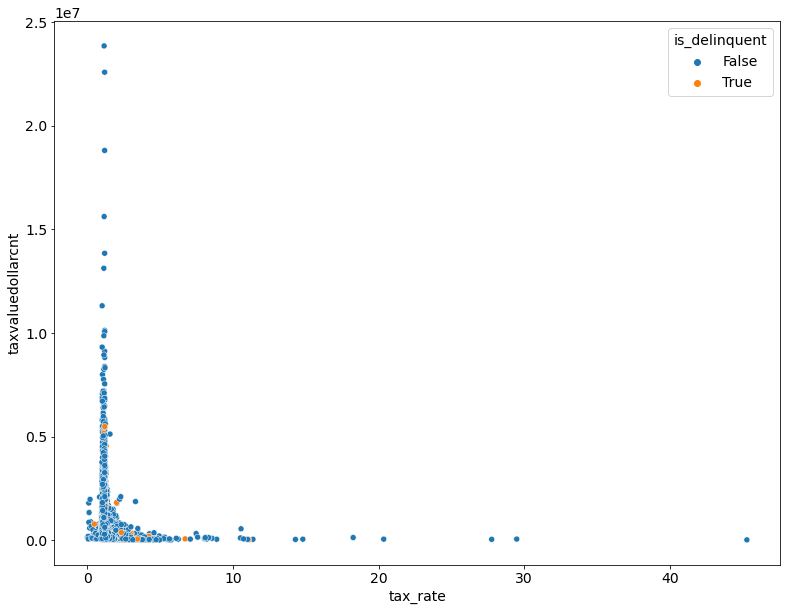

In [38]:
sns.scatterplot(x = "tax_rate", y = "taxvaluedollarcnt", data = tax_df, hue = 'is_delinquent')

#### Still a lot of outliers, for charting purposes will need to clean that up.

### Using manual method to remove `tax_rate` outliers

In [39]:
tax_df = tax_df[tax_df.tax_rate < 4]

In [40]:
tax_df.describe().round(1)

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyyear,tax_rate,lat_cor,long_cor
count,21293.0,21293.0,21238.0,21293.0,21293.0,21293.0,21293.0,21293.0,20927.0,21293.0,8536.0,21279.0,721.0,21293.0,21293.0,21293.0
mean,1511196.2,13051541.9,1800.7,504195.6,6134.2,6049.4,34004123.5,-118201818.7,33378.2,2508.8,187692.4,96605.6,14.1,1.3,34.0,-118.2
std,859048.3,3446502.8,945.4,651095.7,7542.2,21.1,267204.7,361869.8,46395.6,809.6,163382.2,4176.6,1.5,0.3,0.3,0.4
min,349.0,10712101.0,242.0,11089.0,19.9,6037.0,33340851.0,-119388346.0,3491.0,1286.0,6952.0,95982.0,8.0,0.0,33.3,-119.4
25%,775211.0,11564729.0,1188.0,211974.0,2739.0,6037.0,33806758.0,-118414412.0,12447.0,1286.0,41466.0,96193.0,14.0,1.2,33.8,-118.4
50%,1527119.0,12547390.0,1556.0,366056.0,4520.6,6037.0,34019051.0,-118178000.0,25218.0,3101.0,118872.0,96395.0,15.0,1.2,34.0,-118.2
75%,2252567.0,14249294.0,2139.0,589100.0,7133.7,6059.0,34175531.0,-117922962.0,45457.0,3101.0,274765.0,96987.0,15.0,1.3,34.2,-117.9
max,2982274.0,167687839.0,15450.0,23858374.0,276797.8,6111.0,34779658.0,-117555373.0,396556.0,3101.0,764166.0,399675.0,15.0,4.0,34.8,-117.6


In [41]:
(tax_df.taxvaluedollarcnt > 589100.0).sum()

5323

### Adding county names

In [42]:
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate,lat_cor,long_cor,fips_geo,is_delinquent
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536,33.981374,-118.317057,06037,True
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505,34.686163,-118.113100,06037,True
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962,33.999877,-118.291863,06037,False
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299,33.694636,-117.912245,06059,False
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705,33.985377,-118.361620,06037,False


In [43]:
np.where(tax_df['fips_geo'] == '06037', True, False)

array([ True,  True,  True, ..., False,  True,  True])

In [44]:
# Creating a list of our conditions:
conditions = [(tax_df['fips_geo'] == '06037'), (tax_df['fips_geo'] == '06059'), (tax_df['fips_geo'] == '06111')]

# create a list of the values we want to assign for each condition:
values_geo = ['Los Angeles County', 'Orange County', 'Ventura County']

# create a new column and use np.select to assign values to it using our lists as arguments:
tax_df['county'] = np.select(conditions, values_geo)

# Display the dataframe:
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate,lat_cor,long_cor,fips_geo,is_delinquent,county
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536,33.981374,-118.317057,06037,True,Los Angeles County
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505,34.686163,-118.113100,06037,True,Los Angeles County
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962,33.999877,-118.291863,06037,False,Los Angeles County
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299,33.694636,-117.912245,06059,False,Orange County
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705,33.985377,-118.361620,06037,False,Los Angeles County


<AxesSubplot:xlabel='tax_rate', ylabel='taxvaluedollarcnt'>

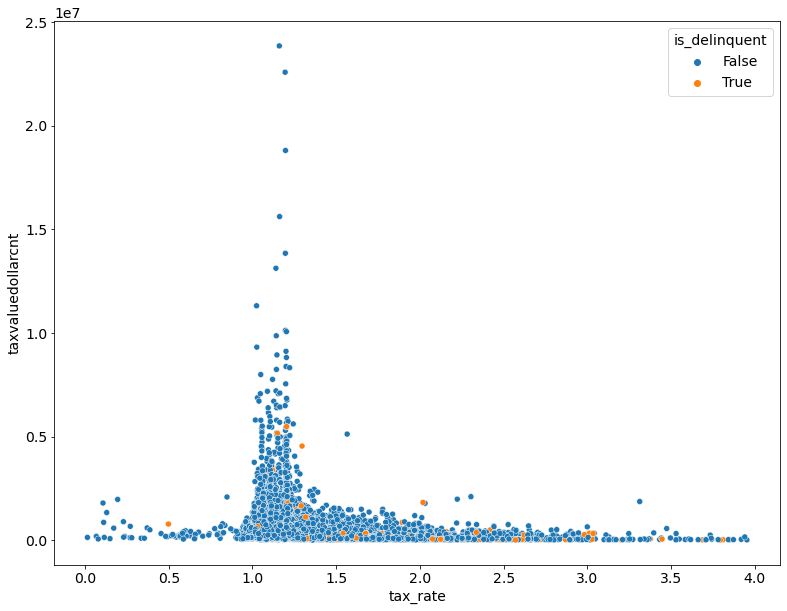

In [45]:
sns.scatterplot(x = "tax_rate", y = "taxvaluedollarcnt", data = tax_df, hue = 'is_delinquent')

#### With the outliers removed, this provides an easier view of the distribution of tax rates vs property tax values.

### Charts of Tax Rate by County

- Several charts were created to help the data science team to visualize the difference and distributions of tax rates across the threee counties. 
- These are for visualization purposes, and for a guide to further analysis.

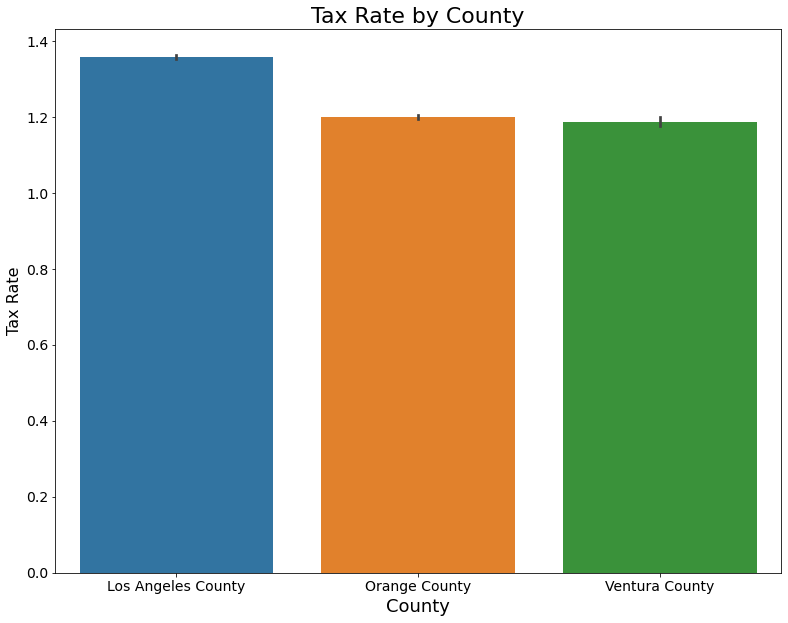

In [46]:
sns.barplot(data = tax_df, y = 'tax_rate', x = 'county').set_title('Tax Rate by County', fontsize = 22)
plt.xlabel('County', fontsize=18)
plt.ylabel('Tax Rate', fontsize=16)

plt.show()
# fig.savefig('tax_rate_by_county.jpg')

#### Creating the variables to be used in the histograms:

In [47]:
ventura_county = tax_df.tax_rate.loc[tax_df['fips_geo'] == '06111']
la_county = tax_df.tax_rate.loc[tax_df['fips_geo'] == '06037']
orange_county = tax_df.tax_rate.loc[tax_df['fips_geo'] == '06059']

#### Creating Histograms of tax rates:

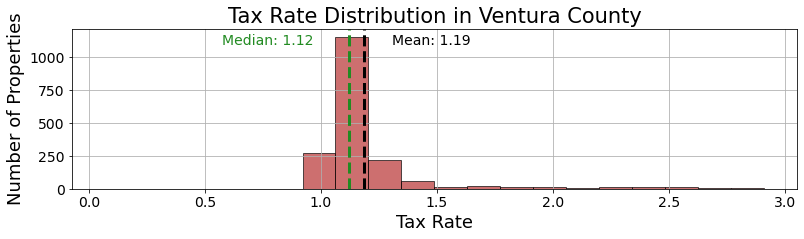

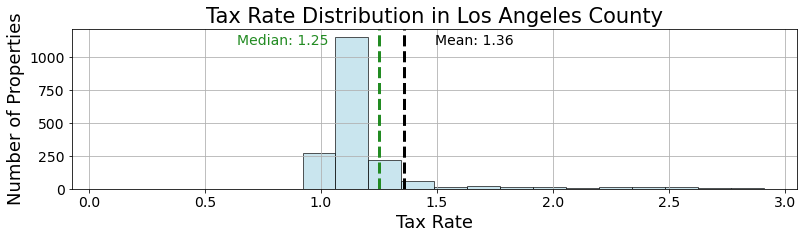

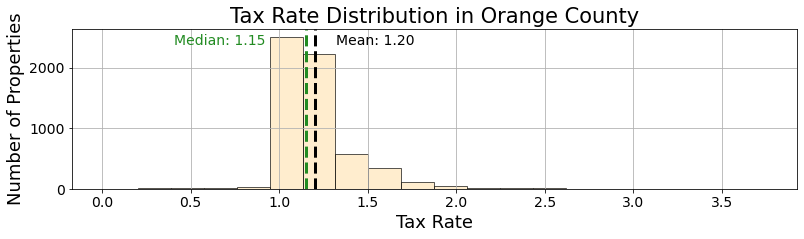

In [53]:
# Creating the histograms

# Ventura County:
plt.subplot(311)
plt.hist(x = ventura_county, bins = 20, color = 'firebrick', edgecolor='k', alpha=0.65)
plt.title('Tax Rate Distribution in Ventura County', fontsize = 21)
plt.xlabel('Tax Rate', fontsize = 18)
plt.ylabel('Number of Properties', fontsize = 18)

plt.axvline(ventura_county.mean(), color = 'k', linestyle='dashed', linewidth=3)
min_ylim_v, max_ylim_v = plt.ylim()
plt.text(ventura_county.mean()*1.1, max_ylim_v*0.9, 'Mean: {:.2f}'.format(ventura_county.mean()))
plt.axvline(ventura_county.median(), color = 'forestgreen', linestyle='dashed', linewidth=3)
plt.text(ventura_county.median()*.51, max_ylim_v*0.9, 'Median: {:.2f}'.format(ventura_county.median()), c = 'forestgreen')

plt.grid(True)
plt.show()

# Los Angeles County:

plt.subplot(312)
plt.hist(x = ventura_county, bins = 20, color = 'lightblue', edgecolor='k', alpha=0.65)
plt.title('Tax Rate Distribution in Los Angeles County', fontsize = 21)
plt.xlabel('Tax Rate', fontsize = 18)
plt.ylabel('Number of Properties', fontsize = 18)

plt.axvline(la_county.mean(), color = 'k', linestyle='dashed', linewidth=3)
min_ylim_la, max_ylim_la = plt.ylim()
plt.text(la_county.mean()*1.1, max_ylim_la*0.9, 'Mean: {:.2f}'.format(la_county.mean()))
plt.axvline(la_county.median(), color = 'forestgreen', linestyle='dashed', linewidth=3)
plt.text(la_county.median()*.51, max_ylim_la*0.9, 'Median: {:.2f}'.format(la_county.median()), c = 'forestgreen')

plt.grid(True)
plt.show()

# Orange County:

plt.subplot(313)
plt.hist(x = orange_county, bins = 20, color = 'moccasin', edgecolor='k', alpha=0.65)
plt.title('Tax Rate Distribution in Orange County', fontsize = 21)
plt.xlabel('Tax Rate', fontsize = 18)
plt.ylabel('Number of Properties', fontsize = 18)

plt.axvline(orange_county.mean(), color = 'k', linestyle='dashed', linewidth=3)
min_ylim_o, max_ylim_o = plt.ylim()
plt.text(orange_county.mean()*1.1, max_ylim_o*0.9, 'Mean: {:.2f}'.format(orange_county.mean()))
plt.axvline(orange_county.median(), color = 'forestgreen', linestyle='dashed', linewidth=3)
plt.text(orange_county.median()*.35, max_ylim_o*0.9, 'Median: {:.2f}'.format(orange_county.median()), c = 'forestgreen')

plt.grid(True)

# Saving the figure
plt.savefig('tax_rate_graphs.png')
plt.show()



### Takeaways:

From these histograms we can see that the tax rates of the 3 counties in California are fairly close, however the average tax rate is highest in LA county, follow by Orange county and lastly Ventura county.

Some other Highlights:
- Both LA and Ventura counties' tax rates have a right skewness (positive skew) to their distributions.
- While Orange county does have some right and left tails, they are faily thin tails and are relatively symmetric, compared to the other two counties.

In [54]:
# https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697

## Saving to .csv

This was the final step in the tax rate analysis process. Needed to explore a finished .csv in order to import the information into our mapping tool. We tried several routes, but in the end decided to go with Tableau to produce a map of the counties and the comparative tax rates in each.

In [55]:
# Run this cell to save the dataframe to a .csv

tax_df.to_csv('tax_data_report.csv')

# Explore Stage Complete